# Classification methods in sklearn

In [1]:
# A few useful imports and settings for plotting.

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Customize all matplotlib plots
font = {'size': 18}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

# Make notebook reproducible
random_state = 83183
np.random.seed(random_state)

In [2]:
# Define function to plot classification results
def plot_results(method, x, t, y, ttl):
    bounds = [-2, 4, -3, 4]
    a, b = np.mgrid[bounds[0]:bounds[1]:0.05, bounds[2]:bounds[3]:0.05]
    s = a.shape
    a = a.flatten()
    b = b.flatten()
    d = method.predict(np.vstack((a,b)).T)
    
    d = d.reshape(s)
    plt.contourf(d.T, extent=bounds, origin='lower', aspect='auto', 
             cmap=plt.cm.Paired)
    plt.scatter(x[:,0], x[:,1], c=y, s=30)
    
    errors = y != t
    plt.plot(x[errors,0], x[errors,1], 'xr', ms=10, mew=2)
    
    plt.xlim(bounds[:2])
    plt.ylim(bounds[2:])
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(ttl)

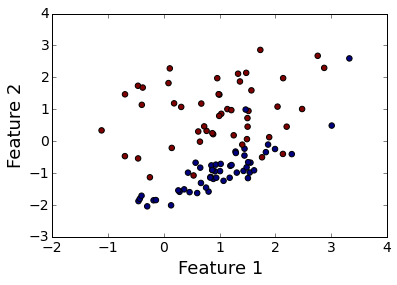

In [3]:
# Create random classification problem
from sklearn import datasets
x, t = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                                    n_clusters_per_class=1, n_classes=2, random_state=random_state)
plt.scatter(x[:,0], x[:,1], c=t, s=30)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## Linear classifiers

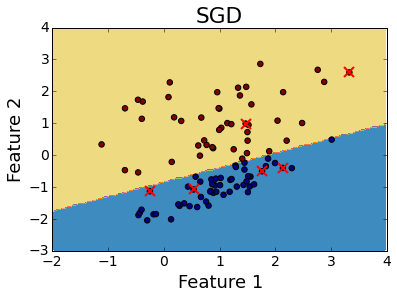

In [4]:
from sklearn import linear_model

clf = linear_model.SGDClassifier(n_iter=500)
clf.fit(x, t)
y = clf.predict(x)

plot_results(clf, x, t, y, 'SGD')

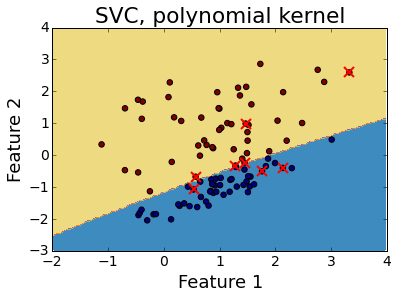

In [5]:
from sklearn import svm

clf = svm.SVC(kernel='poly', degree=3)
clf.fit(x, t)
y = clf.predict(x)

plot_results(clf, x, t, y, 'SVC, polynomial kernel')

## Decision trees

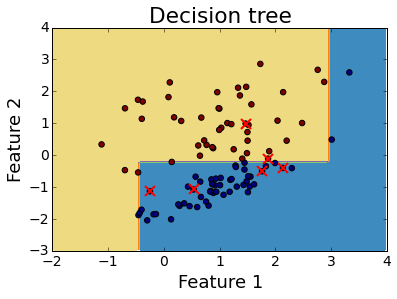

In [6]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(x, t)
y = clf.predict(x)

plot_results(clf, x, t, y, 'Decision tree')

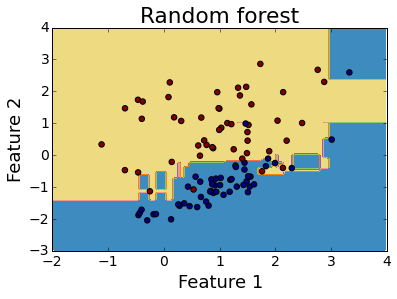

In [7]:
from sklearn import ensemble

#clf = ensemble.RandomForestClassifier(n_estimators=10)
clf = ensemble.ExtraTreesClassifier(n_estimators=3)
clf.fit(x, t)
y = clf.predict(x)

plot_results(clf, x, t, y, 'Random forest')

## K-NN

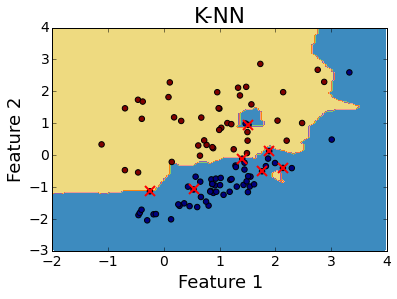

In [8]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=2)
clf.fit(x, t)
y = clf.predict(x)

plot_results(clf, x, t, y, 'K-NN')

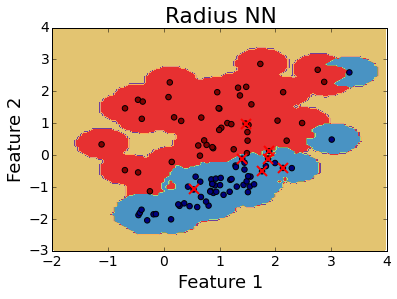

In [9]:
clf = neighbors.RadiusNeighborsClassifier(radius=0.5, outlier_label=2)
clf.fit(x, t)
y = clf.predict(x)

plot_results(clf, x, t, y, 'Radius NN')

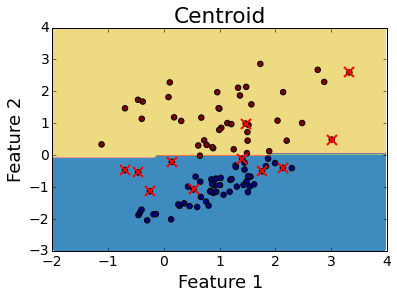

In [10]:
clf = neighbors.NearestCentroid()
clf.fit(x, t)
y = clf.predict(x)

plot_results(clf, x, t, y, 'Centroid')

## Evaluating classifiers

In [11]:
svc = svm.SVC(kernel='rbf')
svc.fit(x, t)
y = svc.predict(x)

In [12]:
from sklearn import metrics

print 'Confusion matrix'
print metrics.confusion_matrix(t, y)

Confusion matrix
[[49  3]
 [ 5 43]]


In [13]:
print 'Accuracy =', svc.score(x, t)
print 'Precision =', metrics.precision_score(t, y)
print 'Recall =', metrics.recall_score(t, y)

Accuracy = 0.92
Precision = 0.934782608696
Recall = 0.895833333333
